# OAuth authorization credentials

In [82]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
import twitter
import json

In [ ]:
CONSUMER_KEY = '' 
CONSUMER_SECRET = '' 
OAUTH_TOKEN = '' 
OAUTH_TOKEN_SECRET = ''

In [56]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                            CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth = auth)
print twitter_api


# Retrieving trends

In [57]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977
UK_WOE_ID =  23424975
FR_WOE_ID = 23424819

In [58]:
world_trends = twitter_api.trends.place(_id = WORLD_WOE_ID)
fr_trends = twitter_api.trends.place(_id = FR_WOE_ID)
us_trends = twitter_api.trends.place(_id = US_WOE_ID)
uk_trends = twitter_api.trends.place(_id = UK_WOE_ID)

In [59]:
print json.dumps(world_trends, indent=1)
print
print json.dumps(fr_trends, indent=1)
print
print json.dumps(us_trends, indent=1)
print
print json.dumps(uk_trends, indent=1)

[
 {
  "created_at": "2016-07-16T22:48:16Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23MTVHottest", 
    "query": "%23MTVHottest", 
    "tweet_volume": 5165566, 
    "name": "#MTVHottest", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D8%B4%D9%8A%D8%A1_%D8%AC%D9%85%D9%8A%D9%84_%D9%8A%D8%A8%D8%AF%D8%A7_%D8%A8%D8%A7%D9%88%D9%84_%D8%AD%D8%B1%D9%81_%D8%A8%D8%A7%D8%B3%D9%85%D9%83", 
    "query": "%23%D8%B4%D9%8A%D8%A1_%D8%AC%D9%85%D9%8A%D9%84_%D9%8A%D8%A8%D8%AF%D8%A7_%D8%A8%D8%A7%D9%88%D9%84_%D8%AD%D8%B1%D9%81_%D8%A8%D8%A7%D8%B3%D9%85%D9%83", 
    "tweet_volume": 24726, 
    "name": "#\u0634\u064a\u0621_\u062c\u0645\u064a\u0644_\u064a\u0628\u062f\u0627_\u0628\u0627\u0648\u0644_\u062d\u0631\u0641_\u0628\u0627\u0633\u0645\u0643", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23Millet%C3%A7eMeydanlarday%C4%B1z", 
    "query": "%23Millet%C3%A7eMeydanlarday%C4%B1z", 
    "tweet_volume": 253619, 
   

# Computing the intersection of two sets of trends 

In [60]:
world_trends_set = set([trend['name']
                       for trend in world_trends[0]['trends']])
fr_trends_set = set([trend['name']
                    for trend in fr_trends[0]['trends']])
us_trends_set = set([trend['name']
                    for trend in us_trends[0]['trends']])
uk_trends_set = set([trend['name']
                    for trend in uk_trends[0]['trends']])
common_trends = world_trends_set.intersection(fr_trends_set)

uk_us_common_trends = uk_trends_set.intersection(us_trends_set)
print common_trends
print uk_us_common_trends

set([u'#MTVHottest', u'#TuSortPasAvecMoiSi', u'#sabrinasaturday', u'#LifeLessonsLearnedIn5Words', u'#AskKendallSchmidt', u'#FortBoyard', u'#GetToKnowTheEspinosas', u'#GrowingUpWithBraces'])
set([u'#FanMemoriesWithCamila', u'#MTVHottest', u'Rigo', u'#UnmadeFilmPrequels', u'#LifeLessonsLearnedIn5Words', u'#2016inthreewords', u'#joepressions', u'#GrowingUpWithBraces', u'#Bellator158'])


# Searching for tweets

In [136]:
# collecting search results
q1 = '#AUSummit'
q ='#God'
count = 100

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

In [137]:
# iterate through 10 more batches of results by following the cursor
for _ in range(10):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # create a dict from next_results, which has the following form:
    # ?max_id=32155486654&q=NAA&include_entities=1
    kwargs = dict([kv.split('=') for kv in next_results[1:].split("&")])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
# show one sample search result by slicing the list

print json.dumps(statuses[0], indent=1)

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 300
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @choicewithin: Some people today will test your patience but don\u2019t get upset. You never know what they might be going through. Lead &amp; sp\u2026", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 754623311905169408, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 323264925, 
    "indices": [
     3, 
     16
    ], 
    "id_str": "323264925", 
    "screen_name": "choicewithin", 
    "name": "Choicewithin"
   }
  ], 
  "hashtags": [
   {
    "indices": [
     143, 
     144
    ], 
    "text": "God"
   }
  ], 
  "urls": []
 }, 
 "retweeted": false, 
 "coordinates": null, 
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>", 
 "in_reply_to_screen_name": null, 
 "in_reply_to_user_id": null, 
 "retweet_count": 25, 
 "id

# Extracting Tweet Entities

In [138]:
# Extracting text, screen names, and hashtags from tweets
status_texts = [ status['text'] for status in statuses]

screen_names = [ user_mention['screen_name'] 
               for status in statuses
                   for user_mention in status['entities']['user_mentions']]
hashtags = [ hashtag['text'] 
           for status in statuses
               for hashtag in status['entities']['hashtags']]

In [139]:
# compute a collection of all words from all tweets
words = [w
            for t in status_texts
                for w in t.split()]

In [140]:
# Explore the first 5 items for each
print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1)
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "RT @choicewithin: Some people today will test your patience but don\u2019t get upset. You never know what they might be going through. Lead &amp; sp\u2026", 
 "RT @FGCFestacDHQ: There must be #CompleteObedience to #God\n#RevKafilat @FGCFestacDHQ", 
 "As you kneel down to pray, Ask #God to keep your haters away.", 
 "When you bless others #God blesses you.", 
 "Always remember #God is good all the time"
]
[
 "choicewithin", 
 "FGCFestacDHQ", 
 "FGCFestacDHQ", 
 "FGCFestacDHQ", 
 "FGCFestacDHQ"
]
[
 "God", 
 "CompleteObedience", 
 "God", 
 "RevKafilat", 
 "God"
]
[
 "RT", 
 "@choicewithin:", 
 "Some", 
 "people", 
 "today"
]


# Analyzing Tweets and Tweet Entities with Frequency Analysis

In [141]:
from collections import Counter

In [142]:
# creating a basic frequency distribution from the words in tweets

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print

[(u'RT', 155), (u'#God', 142), (u'you', 100), (u'the', 88), (u'to', 83), (u'is', 62), (u'in', 43), (u'of', 41), (u'#RevKafilat', 38), (u'@FGCFestacDHQ', 37)]

[(u'FGCFestacDHQ', 75), (u'DerronEShort', 10), (u'THEREALTYMULA', 9), (u'MinLeeRice', 5), (u'younusalgohar', 5), (u'OfficiaIKanye', 4), (u'can2009', 4), (u'_23god_', 3), (u'famouslos32', 3), (u'McaCeo', 3)]

[(u'God', 187), (u'RevKafilat', 41), (u'Jesus', 10), (u'Jordan', 9), (u'god', 7), (u'jesus', 7), (u'GOD', 7), (u'Christians', 6), (u'Life', 6), (u'atheism', 6)]



In [143]:
# using prettytable to display tuples in a nice tabular format
from prettytable import PrettyTable

for label, data in (('Word', words),
                   ('Screen Name', screen_names),
                   ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [pt.add_row(kv) for kv in c.most_common()[:10]]
    pt.align[label], pt.align['Count'] = 'l', 'r' # set column alignment
    print pt

+---------------+-------+
| Word          | Count |
+---------------+-------+
| RT            |   155 |
| #God          |   142 |
| you           |   100 |
| the           |    88 |
| to            |    83 |
| is            |    62 |
| in            |    43 |
| of            |    41 |
| #RevKafilat   |    38 |
| @FGCFestacDHQ |    37 |
+---------------+-------+
+---------------+-------+
| Screen Name   | Count |
+---------------+-------+
| FGCFestacDHQ  |    75 |
| DerronEShort  |    10 |
| THEREALTYMULA |     9 |
| MinLeeRice    |     5 |
| younusalgohar |     5 |
| OfficiaIKanye |     4 |
| can2009       |     4 |
| _23god_       |     3 |
| famouslos32   |     3 |
| McaCeo        |     3 |
+---------------+-------+
+------------+-------+
| Hashtag    | Count |
+------------+-------+
| God        |   187 |
| RevKafilat |    41 |
| Jesus      |    10 |
| Jordan     |     9 |
| god        |     7 |
| jesus      |     7 |
| GOD        |     7 |
| Christians |     6 |
| Life       |     

# Calculating lexical diversity for tweets

**Lexical diversity** *is a measure of how many different words that are used in a text, while lexical density provides a measure of the proportion of lexical items (i.e. nouns, verbs, adjectives and some adverbs) in the text.*

In [144]:
# compute lexical diversity
def lexical_diversity(tokens):
    return 1.0 * len(set(tokens)) / len(tokens)

In [145]:
# compute the average number of words per tweet
def average_words(statuses):
    total_words = sum([len(s.split()) for s in statuses])
    return 1.0 * total_words / len(statuses)
print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.387965760322
0.44769874477
0.382252559727
13.24


- The lexical diversity of the words in the text of the tweets is around **0.387**. One way to interpret that figure would be to say that about **two out of every five words is unique**, or you might say that **each status update carries around 40% unique information**. Given that the average number of words in each tweet is around 13, that translates to about **five unique words per tweet**.

- The lexical diversity of the screen names, however, is even higher, with a value of **0.447**, which means that about **4.5 out of 10** screen names mentioned are unique. This observation also makes sense given that many answers to the question will be a screen name, and that most people won’t be providing the same responses for the solicitous hashtag.

- The lexical diversity of the hashtags is  low at a value of around 0.382, implying that very few values other than the #God hashtag appear multiple times in the results. Again, this makes good sense given that most responses are short.

- The average number of words per tweet is very low at a value of just under 13, which makes sense given the nature of the hashtag, which is designed to solicit short responses consisting of just a few words.

# Examining Patterns in Retweets

In [149]:
# Finding the most popular retweets
retweets = [
                # store out a tuple of these three values
                (status['retweet_count'],
                 status['retweeted_status']['user']['screen_name'],
                 status['text'])
    
                # for each status
                for status in statuses
    
                # so long as the status meets this condition.
                if status.has_key('retweeted_status')
            ]

# slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen  Name', 'Text'])
[pt.add_row(row) for row in sorted(retweets, reverse=True)[:5]]
pt.max_width['Text'] = 40
pt.align='l'
print pt

+-------+---------------+------------------------------------------+
| Count | Screen  Name  | Text                                     |
+-------+---------------+------------------------------------------+
| 22215 | DailyRapFacts | RT @DailyRapFacts: Desiigner, 21 Savage, |
|       |               | Flatbush Zombies, Cam'ron, Tory Lanez,   |
|       |               | Jazz Cartier &amp; more react to Rich    |
|       |               | Chigga's 'Dat $tick' http…               |
| 17728 | DaReal_Rizzy  | RT @DaReal_Rizzy: "I just got out of     |
|       |               | High School"                             |
|       |               | "I ain't go to High School, I was in     |
|       |               | Juvenile"💀  #XXL                        |
|       |               | https://t.co/4ddEfLXDoO                  |
| 17426 | champagnepapi | RT @champagnepapi: That nigga strong af  |
|       |               | 😭😭                                     |
|       |               | https://t.c

In [148]:
# Looking up users who have retweeted a status
# Get the original tweet id for a tweet from its retweeted_status node

_retweets = twitter_api.statuses.retweets(id=754623311905169408)
print[r['user']['screen_name'] for r in _retweets]

[]


# Visualizing Frequency Data with Histograms

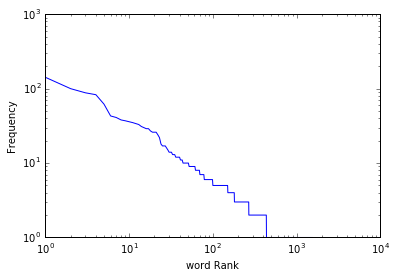

In [152]:
# Plotting frequencies of words
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Frequency")
plt.xlabel("word Rank")
None

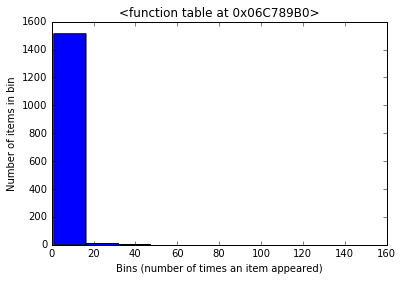

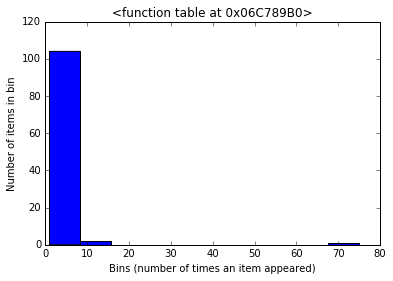

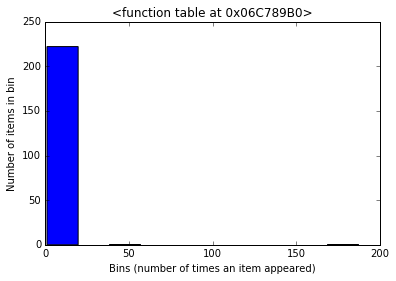

In [156]:
# Generating histograms of words, screen names, and hashtags
for label, data in (('Words', words),
                    ('Screen Names', screen_names),
                    ('Hashtags', hashtags)):
    # Build a frequency map for each set of data and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    plt.title(table)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    plt.figure()
    

[25, 3, 2, 2, 2, 4, 6, 1, 4, 4, 5, 3, 2, 53, 7, 6, 4, 3, 36, 53, 36, 57, 4, 2, 36, 1, 2, 1, 2, 2, 2, 4, 4, 2, 1, 60, 18, 1, 2, 1, 22, 4, 4, 45, 4, 2, 1, 4, 36, 1, 1, 96, 4, 4, 4, 4, 2, 2, 1, 4, 36, 5, 4, 66, 2, 2, 53, 7, 60, 2, 1, 6, 2, 1, 1, 1, 2, 4, 4, 4, 5, 4, 1, 4, 1, 4, 2, 5, 2911, 8075, 6262, 128, 2, 9350, 1, 20, 5, 43, 20, 328, 12784, 1240, 598, 758, 511, 16921, 2, 17728, 2487, 12, 6442, 463, 275, 5, 1851, 240, 175, 856, 18, 6038, 3, 108, 8, 5823, 1, 22215, 1263, 980, 2, 17426, 93, 1183, 2189, 103, 5400, 46, 1510, 4, 138, 15066, 1, 9, 510, 952, 1474, 7707, 304, 1603, 1, 2613, 5, 1, 1527, 719, 2]


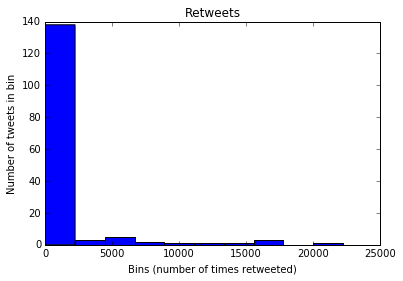

In [157]:
# Generating a hsistogram of retweet counts
# using underscores while unpacking values in 
# a tuple is idiomatic for discarding them

counts = [count for count,_,_ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel("Bins (number of times retweeted)")
plt.ylabel("Number of tweets in bin")

print counts